# Pandas and data injestion



In [3]:
#this is command to list al data which is linux command.
!ls ./movielens


genome-scores.csv  Icon_      ml-20m	  ratings.csv  tags.csv
genome-tags.csv    links.csv  movies.csv  README.txt


In [3]:
!cat ./movielens/movies.csv

In [9]:
!cat ./movielens/movies.csv 



27279


In [10]:
#it gives word count with value l
!cat ./movielens/movies.csv |wc -l

27279


In [14]:
#if we want to display 5 rows of the file
!head -5 ./movielens/movies.csv

In [4]:
import pandas as pd
movies=pd.read_csv('./movielens/movies.csv',sep=',')   #read_csv is function
print(type(movies))                                        #show type of data movies object has
movies.head(5)                                          #it display first rows i.5 rows in dataframe


<class 'pandas.core.frame.DataFrame'>


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
tags=pd.read_csv('./movielens/tags.csv', sep=',')
tags.head(5)

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

In [4]:
ratings=pd.read_csv('./movielens/ratings.csv', sep=',',parse_dates=['timestamp'])
ratings.head(5)

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

In [8]:
row_0=tags.iloc[0]  #it assigns value of first row in row_0 variable through iloc function
type(row_0)         #it gives type of datatype of this row_0..which in this case is series.
                

pandas.core.series.Series

In [11]:
print(row_0)  #displays item in that row_0 which was assigned through iloc function.

userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object


In [12]:
row_0.index #displays the index of the row


Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [13]:
row_0['userId'] #prints the userid 

18

In [15]:
'rating' in row_0   #checks if rating is in row_0

False

In [22]:
row_0=row_0.rename('firstrow')
row_0.name

'firstrow'

# DataFrame


In [23]:
tags.head()

userId  movieId            tag
0      18     4141    Mark Waters
1      65      208      dark hero
2      65      353      dark hero
3      65      521  noir thriller
4      65      592      dark hero

In [24]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [26]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [29]:
tags.iloc[[0,10,1200]]

userId  movieId             tag
0         18     4141     Mark Waters
10        65     1694           jesus
1200     505     3105  Robert De Niro

# Descriptive Statistics


In [30]:
ratings['rating'].describe() #describe function gives all the stats .of the rating column.

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [31]:
ratings.describe() #it describes all column

userId       movieId        rating
count  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00
std    4.003863e+04  1.978948e+04  1.051989e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    3.439500e+04  9.020000e+02  3.000000e+00
50%    6.914100e+04  2.167000e+03  3.500000e+00
75%    1.036370e+05  4.770000e+03  4.000000e+00
max    1.384930e+05  1.312620e+05  5.000000e+00

In [32]:
ratings['rating'].mean()# gives mean of rating column

3.5255285642993797

In [33]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [34]:
ratings['rating'].min()

0.5

In [35]:
ratings['rating'].max()


5.0

In [36]:
ratings['rating'].std()

1.051988919275684

In [37]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [39]:
ratings.corr()

userId   movieId    rating
userId   1.000000 -0.000850  0.001175
movieId -0.000850  1.000000  0.002606
rating   0.001175  0.002606  1.000000

In [41]:
filter_1=ratings['rating']>5
print(filter_1)

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
20000233    False
20000234    False
20000235    False
20000236    False
20000237    False
20000238    False
20000239    False
20000240    False
20000241    False
20000242    False
20000243    False
20000244    False
20000245    False
20000246    False
20000247    False
20000248    False
20000249    False
20000250    False
20000251    False
20000252    False
20000253    False
20000254    False
20000255    False
20000256    False
20000257  

filter_1=ratings['rating']>5  #checks if rating is greater than 5 and fiver false result.
type(filter_1) #filter is series data structure

In [46]:
filter_1=ratings['rating']>0
filter_1.all() # it checks if all ratings are greater than 0

True

# Data Cleaning :Handling missing data


# Real world data problems
Missing values,outliers in data,invalid data i.e type negative values in age,null value, nan value.
We can do following to fix such problems
1. Replace the data
2. Fill gaps forward/backward.
3. Drop field
4. Interpolation.


In [4]:
movies.shape #it shows 27283 rows and 3 column

(27278, 3)

In [7]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [12]:
ratings.shape


(20000263, 4)

In [15]:
tags.shape

(465564, 4)

In [17]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [18]:
# tag has one null value so we need to delete the row that has empty value. 
tags=tags.dropna()

In [19]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [20]:
#thus the null value is removed so data is cleaned by dropna() function


# Different graph plot inbuilt function in pandas
df.plot.bar() #bardiagram
df.plot.box() #box plot
df.plot.hist() #histogram
df.plot() #linegraph
df.plot.area() # area plot
df.barh() #horizontal bar plot
df.density()
df.line()
df.scatter()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80017fdc50>]],
      dtype=object)

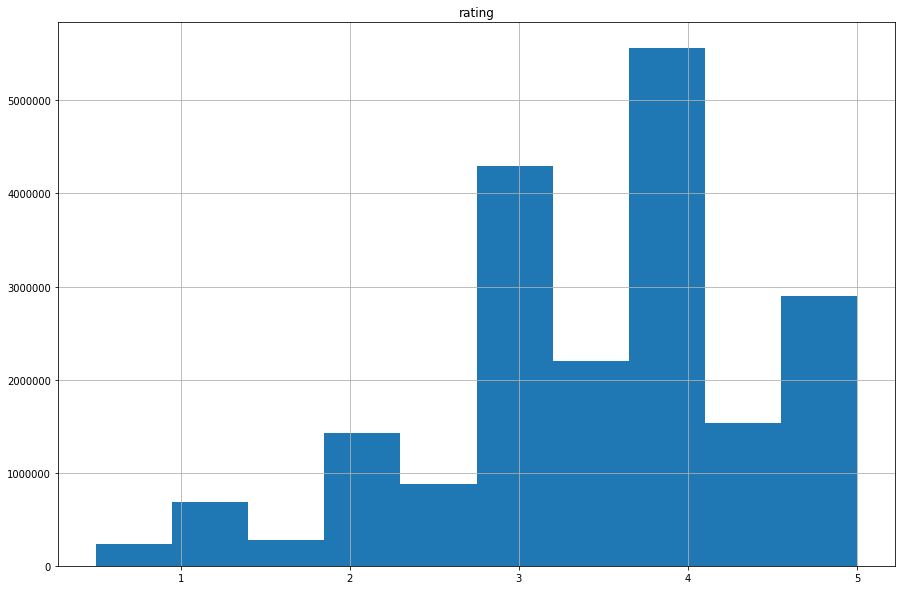

In [21]:
%matplotlib inline
ratings.hist(column='rating',figsize=(15,10))


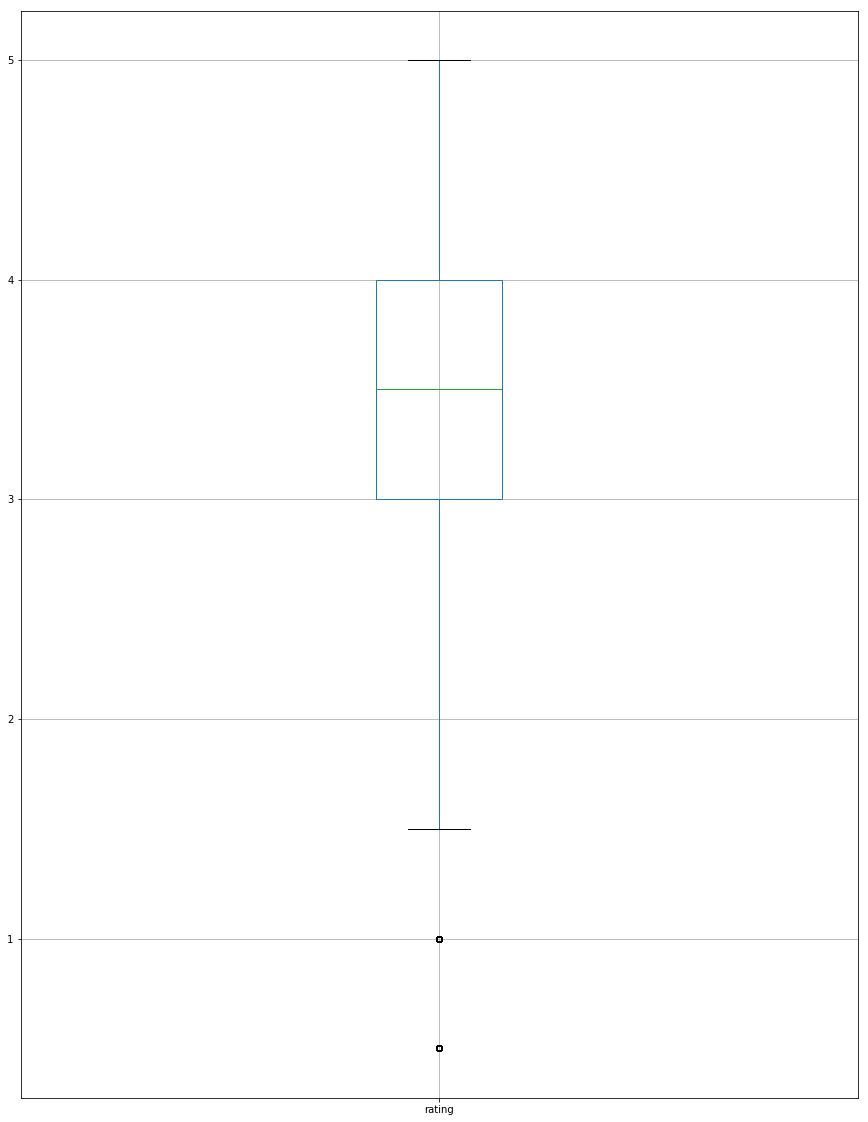

In [23]:
ratings.boxplot(column='rating', figsize=(15,20))

# Different data operations 
 1. Slicing out column:
 2. Filter out rows
 3. Insert new column
 4. Add new row
 5. Delete row
 6. delete column
 7. groupby and aggregate
 

In [25]:
#Slicing 
#following code gives top 5 tag data 

tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [28]:
movies[['title','genres']].head() # it slices out title and genres column data

title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [30]:
ratings[10:100] #ratings is data frame and 10 to 100 is the index number

userId  movieId  rating   timestamp
10       1      293     4.0  1112484703
11       1      296     4.0  1112484767
12       1      318     4.0  1112484798
13       1      337     3.5  1094785709
14       1      367     3.5  1112485980
15       1      541     4.0  1112484603
16       1      589     3.5  1112485557
17       1      593     3.5  1112484661
18       1      653     3.0  1094785691
19       1      919     3.5  1094785621
20       1      924     3.5  1094785598
21       1     1009     3.5  1112486013
22       1     1036     4.0  1112485480
23       1     1079     4.0  1094785665
24       1     1080     3.5  1112485375
25       1     1089     3.5  1112484669
26       1     1090     4.0  1112485453
27       1     1097     4.0  1112485701
28       1     1136     3.5  1112484609
29       1     1193     3.5  1112484690
30       1     1196     4.5  1112484742
31       1     1198     4.5  1112484624
32       1     1200     4.0  1112484560
33       1     1201     3.0  1112484642
34       1     1208     3.5  1112484815
35       1     1214     4.0  1094785977
36       1     1215     4.0  1094786082
37       1     1217     3.5  1112484810
38       1     1219     4.0  1094785994
39       1     1222     3.5  1112484637
..     ...      ...     ...         ...
70       1     2118     4.0  1094786092
71       1     2138     4.0  1112485789
72       1     2140     4.0  1112485705
73       1     2143     4.0  1112485951
74       1     2173     4.0  1112485887
75       1     2174     4.0  1112485843
76       1     2193     4.0  1112485753
77       1     2194     3.5  1112485486
78       1     2253     3.5  1112486122
79       1     2288     4.0  1094786077
80       1     2291     4.0  1094785777
81       1     2542     4.0  1112485447
82       1     2628     4.0  1112485988
83       1     2644     3.5  1112484994
84       1     2648     3.5  1094786017
85       1     2664     3.5  1094786148
86       1     2683     3.5  1094785650
87       1     2692     3.5  1112484749
88       1     2716     3.5  1094786012
89       1     2761     3.0  1112484759
90       1     2762     4.0  1112485367
91       1     2804     3.5  1112485414
92       1     2872     4.0  1112485697
93       1     2918     3.5  1112485465
94       1     2944     4.0  1112485433
95       1     2947     3.5  1112485580
96       1     2959     4.0  1094785698
97       1     2968     4.0  1112485825
98       1     3000     3.5  1112484569
99       1     3030     3.0  1112484548

[90 rows x 4 columns]

In [31]:
 ratings[:100]# get rows until 100

userId  movieId  rating   timestamp
0        1        2     3.5  1112486027
1        1       29     3.5  1112484676
2        1       32     3.5  1112484819
3        1       47     3.5  1112484727
4        1       50     3.5  1112484580
5        1      112     3.5  1094785740
6        1      151     4.0  1094785734
7        1      223     4.0  1112485573
8        1      253     4.0  1112484940
9        1      260     4.0  1112484826
10       1      293     4.0  1112484703
11       1      296     4.0  1112484767
12       1      318     4.0  1112484798
13       1      337     3.5  1094785709
14       1      367     3.5  1112485980
15       1      541     4.0  1112484603
16       1      589     3.5  1112485557
17       1      593     3.5  1112484661
18       1      653     3.0  1094785691
19       1      919     3.5  1094785621
20       1      924     3.5  1094785598
21       1     1009     3.5  1112486013
22       1     1036     4.0  1112485480
23       1     1079     4.0  1094785665
24       1     1080     3.5  1112485375
25       1     1089     3.5  1112484669
26       1     1090     4.0  1112485453
27       1     1097     4.0  1112485701
28       1     1136     3.5  1112484609
29       1     1193     3.5  1112484690
..     ...      ...     ...         ...
70       1     2118     4.0  1094786092
71       1     2138     4.0  1112485789
72       1     2140     4.0  1112485705
73       1     2143     4.0  1112485951
74       1     2173     4.0  1112485887
75       1     2174     4.0  1112485843
76       1     2193     4.0  1112485753
77       1     2194     3.5  1112485486
78       1     2253     3.5  1112486122
79       1     2288     4.0  1094786077
80       1     2291     4.0  1094785777
81       1     2542     4.0  1112485447
82       1     2628     4.0  1112485988
83       1     2644     3.5  1112484994
84       1     2648     3.5  1094786017
85       1     2664     3.5  1094786148
86       1     2683     3.5  1094785650
87       1     2692     3.5  1112484749
88       1     2716     3.5  1094786012
89       1     2761     3.0  1112484759
90       1     2762     4.0  1112485367
91       1     2804     3.5  1112485414
92       1     2872     4.0  1112485697
93       1     2918     3.5  1112485465
94       1     2944     4.0  1112485433
95       1     2947     3.5  1112485580
96       1     2959     4.0  1094785698
97       1     2968     4.0  1112485825
98       1     3000     3.5  1112484569
99       1     3030     3.0  1112484548

[100 rows x 4 columns]

In [32]:
ratings[-10:] # it gives bottom 10 rows

userId  movieId  rating   timestamp
20000253  138493    60816     4.5  1259865163
20000254  138493    61160     4.0  1258390537
20000255  138493    65682     4.5  1255816373
20000256  138493    66762     4.5  1255805408
20000257  138493    68319     4.5  1260209720
20000258  138493    68954     4.5  1258126920
20000259  138493    69526     4.5  1259865108
20000260  138493    69644     3.0  1260209457
20000261  138493    70286     5.0  1258126944
20000262  138493    71619     2.5  1255811136

In [38]:
tags_count=tags['tag'].value_counts()
#it checks the no. of counts for certain tag and sci-fi has 3384 no. of counts.and so on. value_counts() is function.
tags_count[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

In [40]:
tags_count[-10:]# final 10 values of tags_count

Shape of Marvin        1
paltrow                1
bulldyke               1
other people           1
bouncer                1
Bela Lugosi wannabe    1
super soldier          1
dsfd                   1
espers                 1
Lawrence Olivier       1
Name: tag, dtype: int64

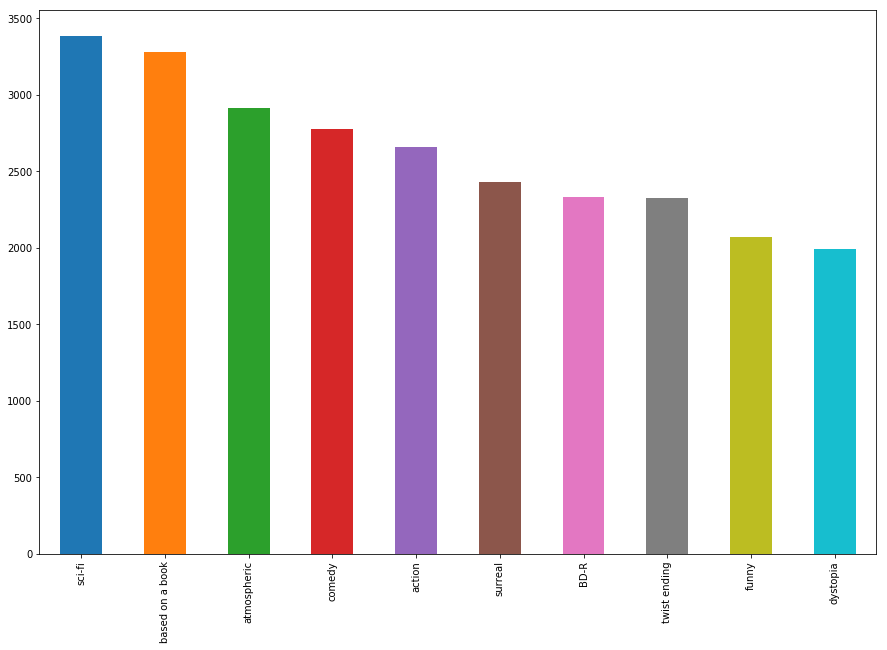

In [43]:
tags_count[:10].plot(kind='bar', figsize=(15,10))

# Filters for selecting row

In [9]:
is_highlyrated=ratings['rating']>=4.0 # creates a filer/object named is_highlyrated with stores the value>4 ratings.
ratings[is_highlyrated][-5:]

userId  movieId  rating   timestamp
20000256  138493    66762     4.5  1255805408
20000257  138493    68319     4.5  1260209720
20000258  138493    68954     4.5  1258126920
20000259  138493    69526     4.5  1259865108
20000261  138493    70286     5.0  1258126944

In [17]:
is_animation=movies['genres'].str.contains('Animation')  #checks in movies df which has Animation in it
movies[is_animation][:5] #displays movies df and top 5 rows [:5]

movieId                    title  \
0          1         Toy Story (1995)   
12        13             Balto (1995)   
47        48        Pocahontas (1995)   
236      239    Goofy Movie, A (1995)   
241      244  Gumby: The Movie (1995)   

                                          genres  
0    Adventure|Animation|Children|Comedy|Fantasy  
12                  Adventure|Animation|Children  
47      Animation|Children|Drama|Musical|Romance  
236            Animation|Children|Comedy|Romance  
241                           Animation|Children

In [18]:
movies[is_animation].head() #alternatively displays top 5 head rows.

movieId                    title  \
0          1         Toy Story (1995)   
12        13             Balto (1995)   
47        48        Pocahontas (1995)   
236      239    Goofy Movie, A (1995)   
241      244  Gumby: The Movie (1995)   

                                          genres  
0    Adventure|Animation|Children|Comedy|Fantasy  
12                  Adventure|Animation|Children  
47      Animation|Children|Drama|Musical|Romance  
236            Animation|Children|Comedy|Romance  
241                           Animation|Children

In [21]:
rating_counts=ratings[['movieId','rating']].groupby('rating').count()
rating_counts

movieId
rating         
0.5      239125
1.0      680732
1.5      279252
2.0     1430997
2.5      883398
3.0     4291193
3.5     2200156
4.0     5561926
4.5     1534824
5.0     2898660

# group by and aggregate


# Merging data


In [3]:
import pandas as pd
movies=pd.read_csv('./movielens/movies.csv',sep=',')
tags=pd.read_csv('./movielens/tags.csv',sep=',')
ratings=pd.read_csv('./movielens/ratings.csv', sep=',')

In [11]:
movies.head()


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [12]:
tags.head()

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

In [17]:
#we do merge operation
t=movies.merge(tags,how='inner')

In [15]:
t.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId                                     tag   timestamp  
0    1644                                 Watched  1417736680  
1    1741                      computer animation  1183903155  
2    1741                 Disney animated feature  1183933307  
3    1741                         Pixar animation  1183934770  
4    1741  TÃ©a Leoni does not star in this movie  1245093573

In [18]:
t=movies.merge(tags, on='movieId',how='inner')

In [19]:
t.head()
#http://pandas.pydata.org/pandas-docs/stable/merging.html

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId                                     tag   timestamp  
0    1644                                 Watched  1417736680  
1    1741                      computer animation  1183903155  
2    1741                 Disney animated feature  1183933307  
3    1741                         Pixar animation  1183934770  
4    1741  TÃ©a Leoni does not star in this movie  1245093573

# combine aggregation merging and filter to get useful analytics


In [31]:
avg_ratings=ratings.groupby('movieId',as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

movieId    rating     timestamp
0        1  3.921240  1.052654e+09
1        2  3.211977  1.037616e+09
2        3  3.151040  9.596480e+08
3        4  2.861393  9.242144e+08
4        5  3.064592  9.620161e+08

In [30]:
avg_ratings=ratings.groupby('movieId',as_index=True).mean()
del avg_ratings['userId']
avg_ratings.head()

rating     timestamp
movieId                        
1        3.921240  1.052654e+09
2        3.211977  1.037616e+09
3        3.151040  9.596480e+08
4        2.861393  9.242144e+08
5        3.064592  9.620161e+08

In [32]:
box_office=movies.merge(avg_ratings,on='movieId',how='inner')
box_office.tail()

movieId                          title                    genres  \
26739   131254   Kein Bund für's Leben (2007)                    Comedy   
26740   131256  Feuer, Eis & Dosenbier (2002)                    Comedy   
26741   131258             The Pirates (2014)                 Adventure   
26742   131260            Rentun Ruusu (2001)        (no genres listed)   
26743   131262               Innocence (2014)  Adventure|Fantasy|Horror   

       rating     timestamp  
26739     4.0  1.427744e+09  
26740     4.0  1.427745e+09  
26741     2.5  1.427745e+09  
26742     3.0  1.427745e+09  
26743     4.0  1.427748e+09

In [34]:
#lets set filter for highly rated
is_highlyrated=box_office['rating']>=4.0
box_office[is_highlyrated][-5:]

movieId                                              title  \
26737   131250                              No More School (2000)   
26738   131252  Forklift Driver Klaus: The First Day on the Jo...   
26739   131254                       Kein Bund für's Leben (2007)   
26740   131256                      Feuer, Eis & Dosenbier (2002)   
26743   131262                                   Innocence (2014)   

                         genres  rating     timestamp  
26737                    Comedy     4.0  1.427743e+09  
26738             Comedy|Horror     4.0  1.427743e+09  
26739                    Comedy     4.0  1.427744e+09  
26740                    Comedy     4.0  1.427745e+09  
26743  Adventure|Fantasy|Horror     4.0  1.427748e+09

In [35]:
is_comedy=box_office['genres'].str.contains('Comedy')
box_office[is_comedy][-5:]

movieId                                              title  \
26736   131248                              Brother Bear 2 (2006)   
26737   131250                              No More School (2000)   
26738   131252  Forklift Driver Klaus: The First Day on the Jo...   
26739   131254                       Kein Bund für's Leben (2007)   
26740   131256                      Feuer, Eis & Dosenbier (2002)   

                                            genres  rating     timestamp  
26736  Adventure|Animation|Children|Comedy|Fantasy     4.0  1.427742e+09  
26737                                       Comedy     4.0  1.427743e+09  
26738                                Comedy|Horror     4.0  1.427743e+09  
26739                                       Comedy     4.0  1.427744e+09  
26740                                       Comedy     4.0  1.427745e+09

In [36]:
box_office[is_comedy & is_highlyrated][:5]

movieId                                        title  \
81        82              Antonia's Line (Antonia) (1995)   
229      232  Eat Drink Man Woman (Yin shi nan nu) (1994)   
293      296                          Pulp Fiction (1994)   
352      356                          Forrest Gump (1994)   
602      608                                 Fargo (1996)   

                          genres    rating     timestamp  
81                  Comedy|Drama  4.004925  9.397648e+08  
229         Comedy|Drama|Romance  4.035610  9.670909e+08  
293  Comedy|Crime|Drama|Thriller  4.174231  1.052293e+09  
352     Comedy|Drama|Romance|War  4.029000  1.055720e+09  
602  Comedy|Crime|Drama|Thriller  4.112359  1.041937e+09

# String operations
http://pandas.pydata.org/pandas-docs/stable/text.html
    

# Vector string operations



In [4]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
movies_genres=movies['genres'].str.split('|',expand=True)
#movies_genres is df and movies is original df
# and 'genres is column of movies df and it seperates the string in genres by pipe |'

In [8]:
# Creates the new column called IsComedy and checks if Comedy is in the genres and displays 
# true or false result
movies['IsComedy']=movies['genres'].str.contains('Comedy')


In [9]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  IsComedy  
0  Adventure|Animation|Children|Comedy|Fantasy      True  
1                   Adventure|Children|Fantasy     False  
2                               Comedy|Romance      True  
3                         Comedy|Drama|Romance      True  
4                                       Comedy      True

In [64]:
#Extract date from title 
movies['year']=movies['title'].str.extract('.*\((.*)\)',expand=True)

In [14]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  IsComedy  year  
0  Adventure|Animation|Children|Comedy|Fantasy      True  1995  
1                   Adventure|Children|Fantasy     False  1995  
2                               Comedy|Romance      True  1995  
3                         Comedy|Drama|Romance      True  1995  
4                                       Comedy      True  1995

# Parsing time stamps



In [50]:
tags=pd.read_csv('./movielens/tags.csv', sep=',')

In [51]:
tags.dtypes


userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [20]:
#here time stamp is int type
tags.head()

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

In [52]:
#here timestamp in not in general understandable.
tags['parsed_time']=pd.to_datetime(tags['timestamp'], unit='s')

In [53]:
tags.head()

userId  movieId            tag   timestamp         parsed_time
0      18     4141    Mark Waters  1240597180 2009-04-24 18:19:40
1      65      208      dark hero  1368150078 2013-05-10 01:41:18
2      65      353      dark hero  1368150079 2013-05-10 01:41:19
3      65      521  noir thriller  1368149983 2013-05-10 01:39:43
4      65      592      dark hero  1368150078 2013-05-10 01:41:18

In [25]:
tags['parsed_time'].dtypes

dtype('<M8[ns]')

In [54]:
#datetime64[ns] maps into map m8[ns] depending on the hardware
#Selecting rows based on time stamps.
greater_than_t=tags['parsed_time']>'2015-02-01'
selected_row=tags[greater_than_t]
tags.shape,selected_row.shape

((465564, 5), (12130, 5))

In [ ]:
#it meeans initially tags has 465564 and 5 column but 12130 is selected row.

# sorting table with time stamps

In [55]:
tags.sort_values(by='parsed_time',ascending=True)[:10]

userId  movieId              tag   timestamp         parsed_time
333932  100371     2788     monty python  1135429210 2005-12-24 13:00:10
333927  100371     1732    coen brothers  1135429236 2005-12-24 13:00:36
333924  100371     1206  stanley kubrick  1135429248 2005-12-24 13:00:48
333923  100371     1193   jack nicholson  1135429371 2005-12-24 13:02:51
333939  100371     5004    peter sellers  1135429399 2005-12-24 13:03:19
333922  100371       47   morgan freeman  1135429412 2005-12-24 13:03:32
333921  100371       47        brad pitt  1135429412 2005-12-24 13:03:32
333936  100371     4011        brad pitt  1135429431 2005-12-24 13:03:51
333937  100371     4011      guy ritchie  1135429431 2005-12-24 13:03:51
333920  100371       32     bruce willis  1135429442 2005-12-24 13:04:02

# Average movie ratings over time


In [56]:
average_rating=ratings[['movieId','rating']].groupby('movieId',as_index=False).mean()

In [57]:
average_rating.tail()


movieId  rating
26739   131254     4.0
26740   131256     4.0
26741   131258     2.5
26742   131260     3.0
26743   131262     4.0

In [58]:
joined=movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

movieId  IsComedy    rating
movieId   1.000000 -0.064225 -0.090369
IsComedy -0.064225  1.000000 -0.058574
rating   -0.090369 -0.058574  1.000000

In [59]:
yearly_average=joined[['year','rating']].groupby('year').mean()

In [48]:
yearly_average.head()

rating
year          
1891  3.000000
1893  3.375000
1894  3.071429
1895  3.125000
1896  3.183036

In [66]:
#yearly_average[-20:].plot(x='year',y='rating',figsize=(15,10),grid=True)
yearly_average[-20:].plot(x='year',y='rating', figsize=(15,10), grid=True)

KeyError: 'year'